## Banknote Authentication Data Set

Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

Problem definition: 

Can we classify bank note as fake or genuine?

Link: [Banknote Authentication](http://archive.ics.uci.edu/ml/datasets/banknote+authentication)

In [1]:
# import all dependencies without running all import commands 
# !pip3 install pyforest

In [2]:
from pyforest import *

In [3]:
lazy_imports()

['from sklearn.model_selection import cross_val_score',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn.preprocessing import MinMaxScaler',
 'import dash',
 'from dask import dataframe as dd',
 'from sklearn.preprocessing import OneHotEncoder',
 'import nltk',
 'from xlrd import open_workbook',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.cluster import KMeans',
 'import spacy',
 'from sklearn import svm',
 'import bokeh',
 'import pydot',
 'import plotly as py',
 'import matplotlib as mpl',
 'import datetime as dt',
 'import textblob',
 'from sklearn.ensemble import RandomForestRegressor',
 'import re',
 'import tqdm',
 'import skimage',
 'from sklearn.linear_model import LassoCV',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import statistics',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.linear_model import LogisticRegression',
 'import cv2',
 'from sklearn.model_select

In [4]:
# import data set
df = pd.read_csv("BankNote_Authentication.csv")

<IPython.core.display.Javascript object>

## Data Pre-Processing

In [5]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
df.shape

(1372, 5)

In [7]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [8]:
# check empty cells in the dataset
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

## Exploratory Data Analysis

In [9]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
# check data types
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Class'}, xlabel='class', ylabel='Density'>

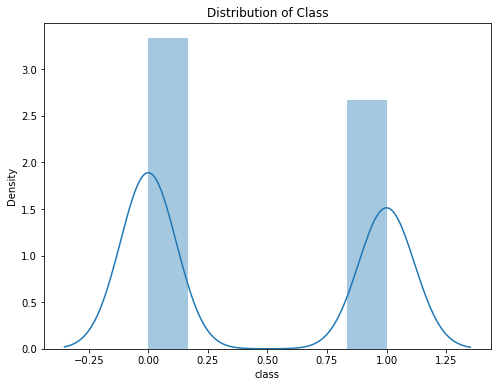

In [13]:
plt.figure(figsize=(8, 6))
plt.title('Distribution of Class')
sns.distplot(df['class'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

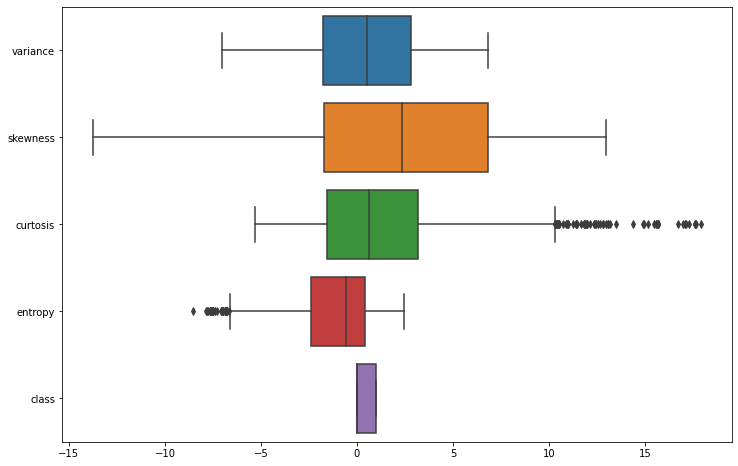

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')

<IPython.core.display.Javascript object>

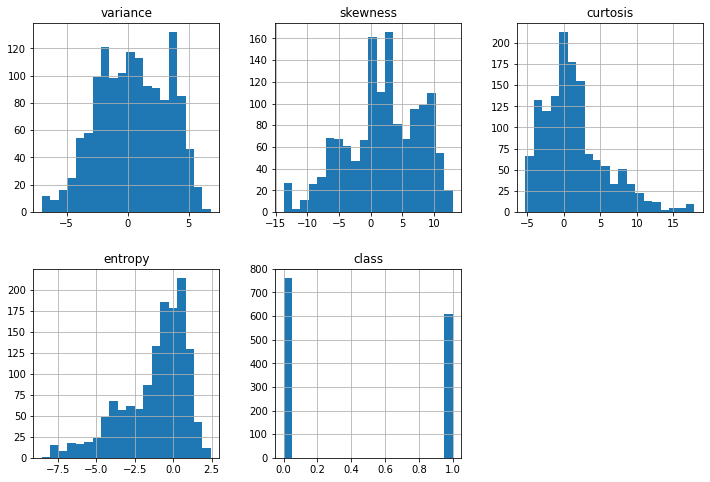

In [15]:
df.hist(bins=20, figsize=(12, 8), layout=(2, 3))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

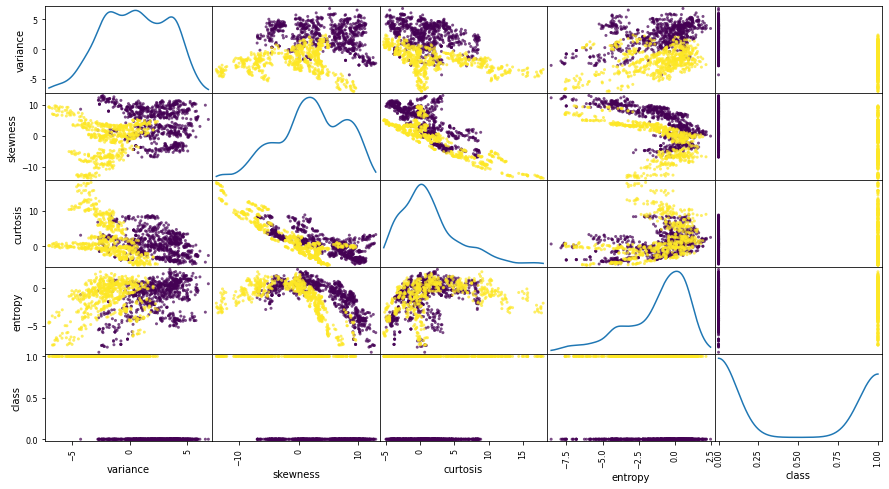

In [16]:
pd.plotting.scatter_matrix(df, diagonal='kde', alpha=0.7, figsize=(15, 8), c=df['class'])
plt.show()

<IPython.core.display.Javascript object>

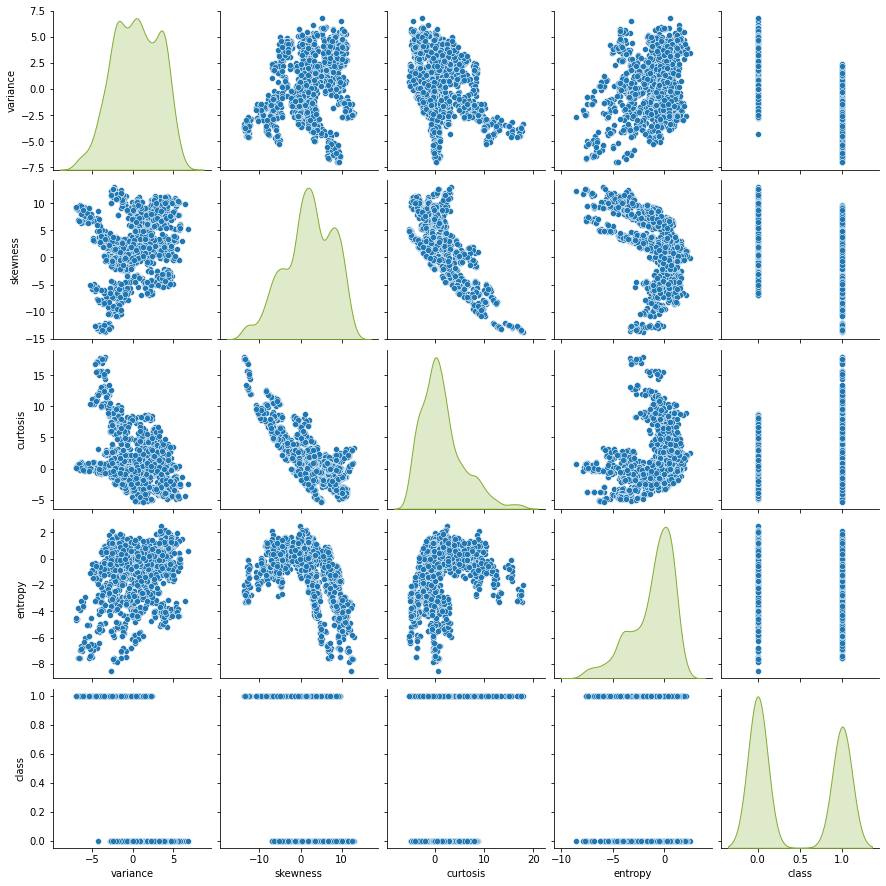

In [17]:
sns.pairplot(
    df, 
    diag_kind='kde',
    diag_kws= {'color': '#82ad32'})

<IPython.core.display.Javascript object>

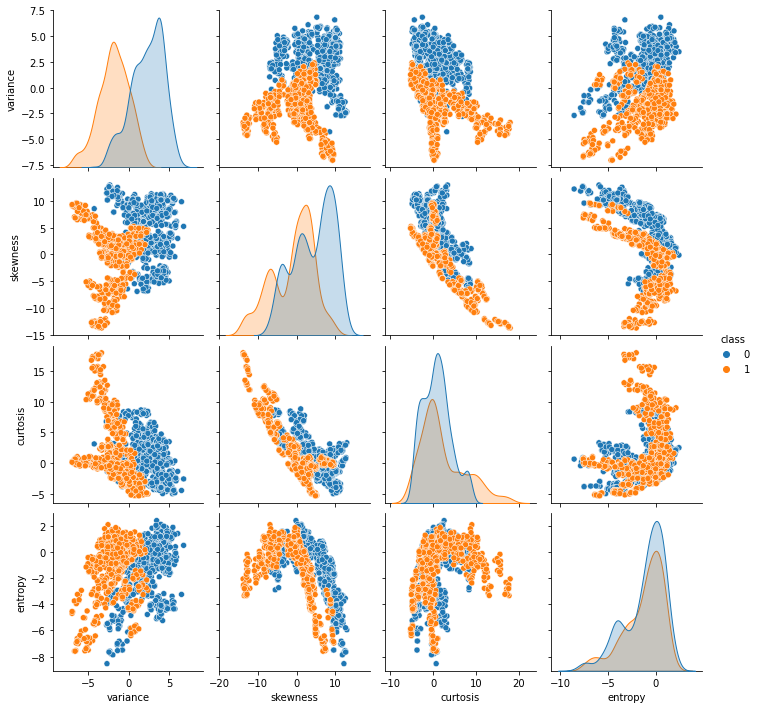

In [18]:
# compare two different class with seaborn pairplot
sns.pairplot(df, hue='class')

## Data Preparation

In [19]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [20]:
X = df.drop('class', axis=1)
y = df['class']

In [21]:
# split data into training and test set, 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20, random_state=1)

<IPython.core.display.Javascript object>

In [22]:
# scale dataset by using StandardScaler
# since y is our target, we don't have to transform it
scaler = StandardScaler()

# fit_transform() on training set, transform() on test set in order to prevent data leakage
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# same as 
# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [23]:
X_train

array([[-1.58438248,  0.1072115 , -0.14276339,  0.03334576],
       [-1.08829139, -2.53123321,  2.67783284, -0.35092979],
       [ 1.13672843, -0.15348755, -0.16820608,  0.86368769],
       ...,
       [-1.6900361 ,  0.72314447, -0.19588896, -2.05114485],
       [ 0.57766241,  0.02698182,  0.1851622 ,  0.52080477],
       [-0.9644631 ,  0.30908695, -0.49734797, -0.03521515]])

In [24]:
X_test

array([[-1.40161022,  0.00380053, -0.28748738, -0.60544127],
       [ 0.31770077,  0.46065296,  0.21305176,  0.6684587 ],
       [-1.56649067, -1.75553029,  2.62694747, -0.12604044],
       ...,
       [ 0.37752872,  0.99347798, -0.99401488,  0.06669456],
       [ 0.28531165,  0.0387362 , -1.09089189,  0.62212394],
       [ 0.49449731,  0.98813508, -0.56431617, -0.61781568]])

In [25]:
y_train

1226    1
1085    1
148     0
1178    1
478     0
       ..
715     0
905     1
1096    1
235     0
1061    1
Name: class, Length: 1097, dtype: int64

In [26]:
y_test

1240    1
703     0
821     1
1081    1
37      0
       ..
654     0
1100    1
90      0
1107    1
262     0
Name: class, Length: 275, dtype: int64

## Data Modeling

### Logistic Regression

In [27]:
# solver ='liblinear' is a good option for small dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

logReg = LogisticRegression(solver ='liblinear', random_state=1)

logReg.fit(X_train, y_train)

accuracies_logReg = cross_val_score(estimator=logReg, X=X_train, y=y_train, cv = 10)

print("Accuracies:\n", accuracies_logReg)
print("Mean Accuracy: {:.2f}%".format(accuracies_logReg.mean()*100))

Accuracies:
 [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]
Mean Accuracy: 98.36%


In [28]:
# make prediction
pred_logReg= logReg.predict(X_test)
pred_logReg

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

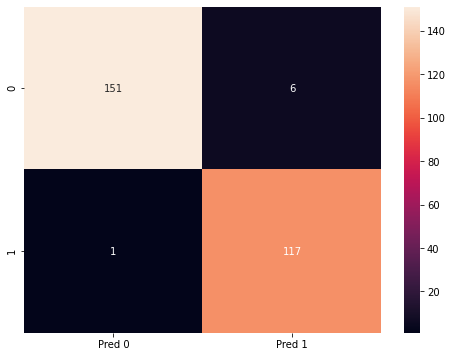

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

cm_logReg = confusion_matrix(y_test, pred_logReg, labels=[0, 1])

df_cm_logReg = pd.DataFrame(cm_logReg, index=[i for i in [0, 1]], columns=[i for i in ['Pred 0', 'Pred 1']])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_logReg, annot=True, fmt='d')
plt.show()

In [30]:
print('Logistic Regression Classification Report')
print('...'*10)
print(classification_report(y_test, pred_logReg))

Logistic Regression Classification Report
..............................
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       157
           1       0.95      0.99      0.97       118

    accuracy                           0.97       275
   macro avg       0.97      0.98      0.97       275
weighted avg       0.98      0.97      0.97       275



### Support Vector Machine

In [31]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')

svm_linear.fit(X_train, y_train)

accuracies_svm_linear = cross_val_score(estimator=svm_linear, X=X_train, y=y_train, cv = 10)

print("Accuracies:\n", accuracies_svm_linear)
print("Mean Accuracy: {:.2f}%".format(accuracies_svm_linear.mean()*100))

Accuracies:
 [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]
Mean Accuracy: 98.54%


In [32]:
pred_svm_linear = svm_linear.predict(X_test)
pred_svm_linear

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

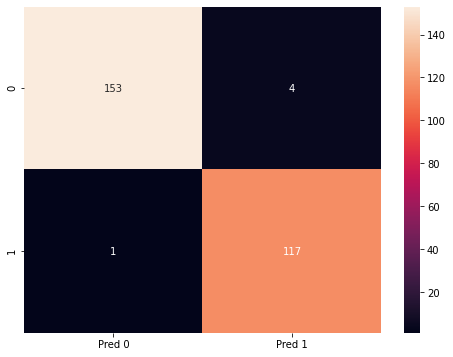

In [33]:
cm_svm_linear = confusion_matrix(y_test, pred_svm_linear, labels=[0, 1])

df_cm_svm_linear = pd.DataFrame(cm_svm_linear, index=[i for i in [0, 1]], columns=[i for i in ['Pred 0', 'Pred 1']])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_svm_linear, annot=True, fmt='d')
plt.show()

In [34]:
# using solver ='rbf' by default
svm_rbf = SVC(kernel='rbf')

svm_rbf.fit(X_train, y_train)

accuracies_svm_rbf = cross_val_score(estimator=svm_rbf, X=X_train, y=y_train, cv = 10)

print("Accuracies:\n", accuracies_svm_rbf)
print("Mean Accuracy: {:.2f}%".format(accuracies_svm_rbf.mean()*100))

# In this case, we have to be cautious about overfitting

Accuracies:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Accuracy: 100.00%


In [35]:
pred_svm_rbf = svm_rbf.predict(X_test)
pred_svm_rbf

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

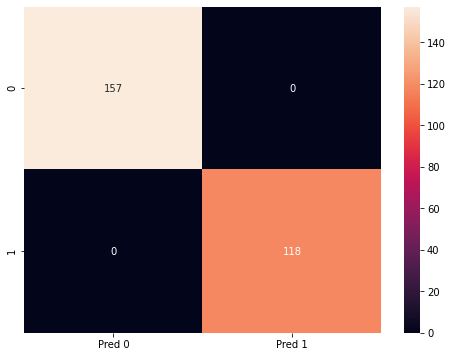

In [36]:
cm_svm_rbf = confusion_matrix(y_test, pred_svm_rbf, labels=[0, 1])

df_cm_svm_rbf = pd.DataFrame(cm_svm_rbf, index=[i for i in [0, 1]], columns=[i for i in ['Pred 0', 'Pred 1']])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_svm_rbf, annot=True, fmt='d')
plt.show()

### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, criterion="entropy", random_state=0)

rf.fit(X_train, y_train)

accuracies_rf = cross_val_score(estimator=rf, X=X_train, y=y_train, cv = 10)

print("Accuracies:\n", accuracies_rf)
print("Mean Accuracy: {:.2f}%".format(accuracies_rf.mean()*100))


Accuracies:
 [0.98181818 1.         0.99090909 0.99090909 1.         0.99090909
 1.         1.         1.         1.        ]
Mean Accuracy: 99.55%


In [38]:
pred_rf = rf.predict(X_test)
pred_rf

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

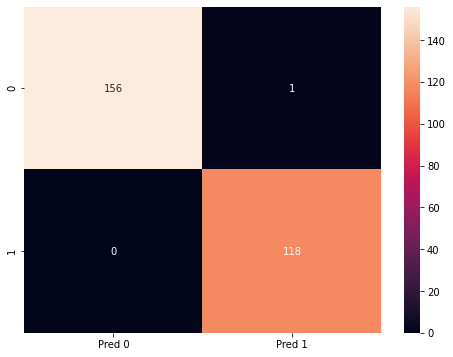

In [39]:
cm_rf = confusion_matrix(y_test, pred_rf, labels=[0, 1])

df_cm_rf = pd.DataFrame(cm_rf, index=[i for i in [0, 1]], columns=[i for i in ['Pred 0', 'Pred 1']])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_rf, annot=True, fmt='d')
plt.show()

### K Nearest Neighbors Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

# introducing grid search to find the best hyperparameters

# setting hyperparameters in a dictionary
param_grid = {
    'leaf_size':[2, 5, 7, 9, 11],
    'n_neighbors':[2, 5, 7, 9, 11],
    'p':[1, 2]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)

grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [41]:
print(grid.best_estimator_)
print(grid.best_params_)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)
{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}


In [42]:
knn = KNeighborsClassifier(n_neighbors=2, p=1, leaf_size=2)

knn.fit(X_train, y_train)

accuracies_knn = cross_val_score(estimator=knn, X=X_train, y=y_train, cv = 10)

print("Accuracies:\n", accuracies_knn)
print("Mean Accuracy: {:.2f}%".format(accuracies_knn.mean()*100))

Accuracies:
 [0.99090909 0.99090909 0.99090909 1.         1.         1.
 1.         1.         1.         1.        ]
Mean Accuracy: 99.73%


In [43]:
pred_knn = knn.predict(X_test)
pred_knn

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

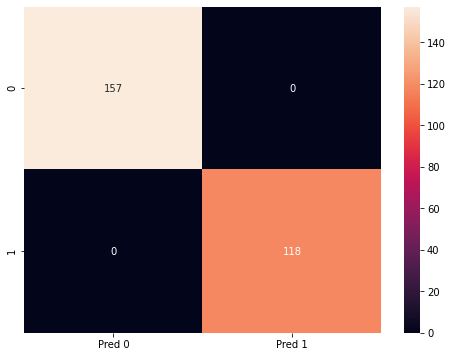

In [44]:
cm_knn = confusion_matrix(y_test, pred_knn, labels=[0, 1])

df_cm_knn = pd.DataFrame(cm_knn, index=[i for i in [0, 1]], columns=[i for i in ['Pred 0', 'Pred 1']])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_knn, annot=True, fmt='d')
plt.show()

### Multi-layer Perceptron Classifier

In [45]:
from sklearn.neural_network import MLPClassifier

mlper_sgd=MLPClassifier(
    hidden_layer_sizes=(8,4), 
    max_iter=1000, 
    alpha=0.0001, 
    solver='sgd',
    verbose=10,
    random_state=1)

mlper_sgd.fit(X_train,y_train)

accuracies_mlper_sgd = cross_val_score(estimator=mlper_sgd,X=X_test,y=y_test,cv=10)

print("Accuracies:\n", accuracies_mlper_sgd)
print("Mean Accuracy: {:.2f}%".format(accuracies_mlper_sgd.mean()*100))

Iteration 1, loss = 0.79550185
Iteration 2, loss = 0.79137998
Iteration 3, loss = 0.78541378
Iteration 4, loss = 0.77863058
Iteration 5, loss = 0.77170087
Iteration 6, loss = 0.76491163
Iteration 7, loss = 0.75803559
Iteration 8, loss = 0.75182547
Iteration 9, loss = 0.74552207
Iteration 10, loss = 0.73963951
Iteration 11, loss = 0.73392409
Iteration 12, loss = 0.72854161
Iteration 13, loss = 0.72318779
Iteration 14, loss = 0.71813663
Iteration 15, loss = 0.71307283
Iteration 16, loss = 0.70816773
Iteration 17, loss = 0.70326709
Iteration 18, loss = 0.69851787
Iteration 19, loss = 0.69371023
Iteration 20, loss = 0.68919219
Iteration 21, loss = 0.68457503
Iteration 22, loss = 0.67989494
Iteration 23, loss = 0.67541513
Iteration 24, loss = 0.67088196
Iteration 25, loss = 0.66638568
Iteration 26, loss = 0.66199491
Iteration 27, loss = 0.65746041
Iteration 28, loss = 0.65312948
Iteration 29, loss = 0.64883003
Iteration 30, loss = 0.64443465
Iteration 31, loss = 0.64022907
Iteration 32, los

In [46]:
pred_mlper_sgd = mlper_sgd.predict(X_test)
pred_mlper_sgd

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

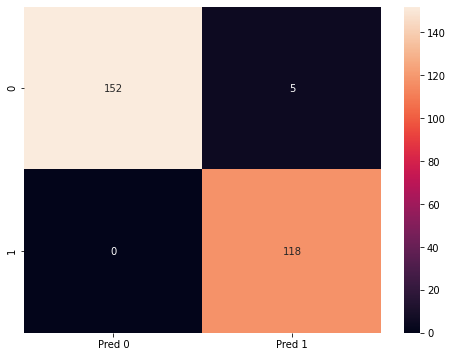

In [47]:
cm_mlper_sgd = confusion_matrix(y_test, pred_mlper_sgd, labels=[0, 1])

df_cm_mlper_sgd = pd.DataFrame(cm_mlper_sgd, index=[i for i in [0, 1]], columns=[i for i in ['Pred 0', 'Pred 1']])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_mlper_sgd, annot=True, fmt='d')
plt.show()

In [48]:
mlper_adam=MLPClassifier(
    hidden_layer_sizes=(8,4), 
    max_iter=1000, 
    alpha=0.0001, 
    solver='adam',
    verbose=10,
    random_state=1)

mlper_adam.fit(X_train,y_train)

accuracies_mlper_adam = cross_val_score(estimator=mlper_adam,X=X_test,y=y_test,cv=10)

print("Accuracies:\n", accuracies_mlper_adam)
print("Mean Accuracy: {:.2f}%".format(accuracies_mlper_adam.mean()*100))

Iteration 1, loss = 0.79265411
Iteration 2, loss = 0.78319003
Iteration 3, loss = 0.77398609
Iteration 4, loss = 0.76488086
Iteration 5, loss = 0.75635537
Iteration 6, loss = 0.74820929
Iteration 7, loss = 0.74012596
Iteration 8, loss = 0.73224819
Iteration 9, loss = 0.72421466
Iteration 10, loss = 0.71650978
Iteration 11, loss = 0.70899388
Iteration 12, loss = 0.70151026
Iteration 13, loss = 0.69375205
Iteration 14, loss = 0.68590440
Iteration 15, loss = 0.67768965
Iteration 16, loss = 0.66899224
Iteration 17, loss = 0.65937340
Iteration 18, loss = 0.64954225
Iteration 19, loss = 0.63959796
Iteration 20, loss = 0.62961455
Iteration 21, loss = 0.61943924
Iteration 22, loss = 0.60927569
Iteration 23, loss = 0.59903081
Iteration 24, loss = 0.58878843
Iteration 25, loss = 0.57858387
Iteration 26, loss = 0.56841750
Iteration 27, loss = 0.55782395
Iteration 28, loss = 0.54741327
Iteration 29, loss = 0.53661141
Iteration 30, loss = 0.52557761
Iteration 31, loss = 0.51442029
Iteration 32, los

In [49]:
pred_mlper_adam = mlper_adam.predict(X_test)
pred_mlper_adam

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

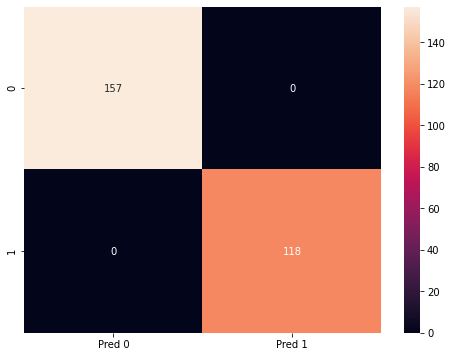

In [50]:
cm_mlper_adam = confusion_matrix(y_test, pred_mlper_adam, labels=[0, 1])

df_cm_mlper_adam = pd.DataFrame(cm_mlper_adam, index=[i for i in [0, 1]], columns=[i for i in ['Pred 0', 'Pred 1']])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_mlper_adam, annot=True, fmt='d')
plt.show()

### Model Comparison

In [55]:
print("Logistic Regression: {}%".format(round(accuracy_score(y_test, pred_logReg)*100, 2)))
print("Support Vector Machine (kernel=linear): {}%".format(round(accuracy_score(y_test, pred_svm_linear)*100, 2)))
print("Support Vector Machine (kernel=rbf): {}%".format(round(accuracy_score(y_test, pred_svm_rbf)*100, 2)))
print("Random Forest Classifier: {}%".format(round(accuracy_score(y_test, pred_rf)*100, 2)))
print("K Nearest Neighbors Classifier: {}%".format(round(accuracy_score(y_test, pred_knn)*100, 2)))
print("Multi-layer Perceptron Classifier (solver=sgd): {}%".format(round(accuracy_score(y_test, pred_mlper_sgd)*100, 2)))
print("Multi-layer Perceptron Classifier (solver=adam): {}%".format(round(accuracy_score(y_test, pred_mlper_adam)*100, 2)))

Logistic Regression: 97.45%
Support Vector Machine (kernel=linear): 98.18%
Support Vector Machine (kernel=rbf): 100.0%
Random Forest Classifier: 99.64%
K Nearest Neighbors Classifier: 100.0%
Multi-layer Perceptron Classifier (solver=sgd): 98.18%
Multi-layer Perceptron Classifier (solver=sgd): 100.0%


## Conclusion

In this example, I demonstrate the process:
- Data Pre-processing
- Exploratory Data Analysis
- Data Preparation
- Data Modeling 
- Model Comparison

By comparing different models, Support Vector Machine(rbf), K Nearest Neighbors Classifier, and Multi-layer Perceptron Classifier (adam) have 100% accuracy classifying the notes.

The rest of the models also perform very well with greater than 97% accuracy.

However, we still have to concern about **Overfitting**.
